**Nama : Winda Ayu Melati** <br>
**Nim  : 211351150** <br>
**Kelas : Teknik Informatika - Pagi A**

#**Import Dataset Kaggle**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"windaayumelati","key":"03748c9e298dbec2b99f164a2b651ba9"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d elakiricoder/gender-classification-dataset

  0% 0.00/19.0k [00:00<?, ?B/s]
100% 19.0k/19.0k [00:00<00:00, 29.9MB/s]


In [4]:
!mkdir gender-classification-dataset
!unzip gender-classification-dataset.zip -d gender-classification-dataset
!ls gender-classification-dataset

Archive:  gender-classification-dataset.zip
  inflating: gender-classification-dataset/gender_classification_v7.csv  
gender_classification_v7.csv


#Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import statistics

#Data Discovery

In [6]:
df = pd.read_csv("gender-classification-dataset/gender_classification_v7.csv")
df.sample()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4305,1,13.7,6.0,0,0,0,1,Female


In [7]:
df.shape

(5001, 8)

In [8]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [10]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [12]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [13]:
df['forehead_width_cm'].unique()


array([11.8, 14. , 14.4, 13.5, 13. , 15.3, 11.9, 12.1, 12.5, 15.5, 14.7,
       14.5, 14.2, 15.2, 14.6, 12.8, 12.9, 12.2, 12.3, 12.7, 14.1, 11.5,
       13.8, 13.7, 12. , 11.4, 15.4, 13.3, 13.2, 14.3, 13.9, 11.7, 15.1,
       15. , 12.4, 11.6, 12.6, 14.8, 13.1, 13.4, 13.6, 14.9])

In [14]:
df['forehead_height_cm'].unique()

array([6.1, 5.4, 6.3, 5.9, 6.8, 6.2, 5.2, 5.8, 6.7, 6.5, 6. , 5.6, 7. ,
       6.4, 5.3, 5.7, 5.1, 5.5, 7.1, 6.6, 6.9])

In [15]:
df.iloc[:,[0]].value_counts()

long_hair
1            4349
0             652
dtype: int64

In [16]:
df.iloc[:,[1]].value_counts()

forehead_width_cm
12.0                 168
11.8                 161
14.1                 155
14.0                 154
11.5                 154
11.6                 152
11.9                 150
14.2                 149
13.3                 149
12.2                 145
12.6                 145
12.1                 145
13.2                 143
14.3                 143
12.5                 141
12.9                 141
13.7                 140
13.6                 138
12.8                 138
12.3                 138
13.4                 137
13.0                 137
13.5                 136
13.8                 134
11.7                 133
13.1                 131
13.9                 131
12.7                 130
12.4                 127
11.4                  84
14.9                  79
14.5                  72
15.2                  71
15.5                  66
15.1                  65
15.3                  64
15.4                  64
14.4                  63
14.6                  61
15.0   

In [17]:
df.iloc[:,[2]].value_counts()

forehead_height_cm
5.7                   306
5.9                   303
5.3                   301
5.5                   299
6.1                   296
5.1                   293
5.8                   290
6.2                   290
6.4                   287
6.3                   285
6.5                   285
5.6                   279
6.0                   275
5.4                   265
5.2                   259
6.6                   126
6.8                   118
7.0                   117
7.1                   113
6.9                   109
6.7                   105
dtype: int64

In [18]:
df.iloc[:,[3]].value_counts()

nose_wide
0            2531
1            2470
dtype: int64

In [19]:
df.iloc[:,[4]].value_counts()

nose_long
1            2540
0            2461
dtype: int64

In [20]:
df.iloc[:,[5]].value_counts()

lips_thin
0            2535
1            2466
dtype: int64

In [21]:
df.iloc[:,[6]].value_counts()

distance_nose_to_lip_long
0                            2506
1                            2495
dtype: int64

In [22]:
df.skew()

<ipython-input-22-9e0b1e29546f>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



long_hair                   -2.196146
forehead_width_cm            0.242242
forehead_height_cm           0.250739
nose_wide                    0.024404
nose_long                   -0.031607
lips_thin                    0.027605
distance_nose_to_lip_long    0.004400
dtype: float64

#EDA

<Axes: >

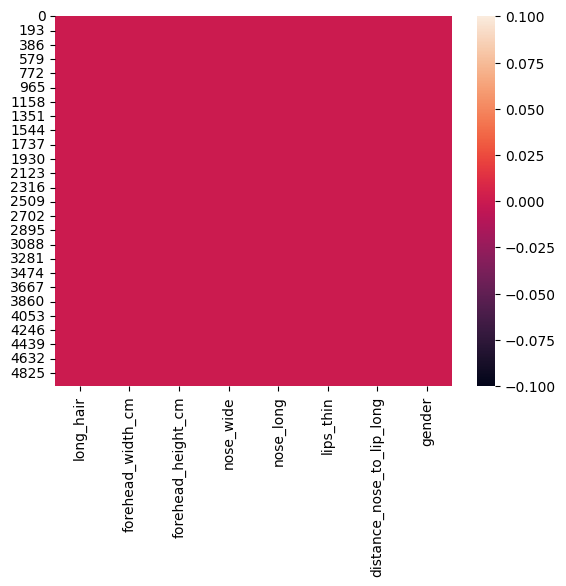

In [23]:
sns.heatmap(df.isnull())

<ipython-input-24-97cdbf7f1862>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

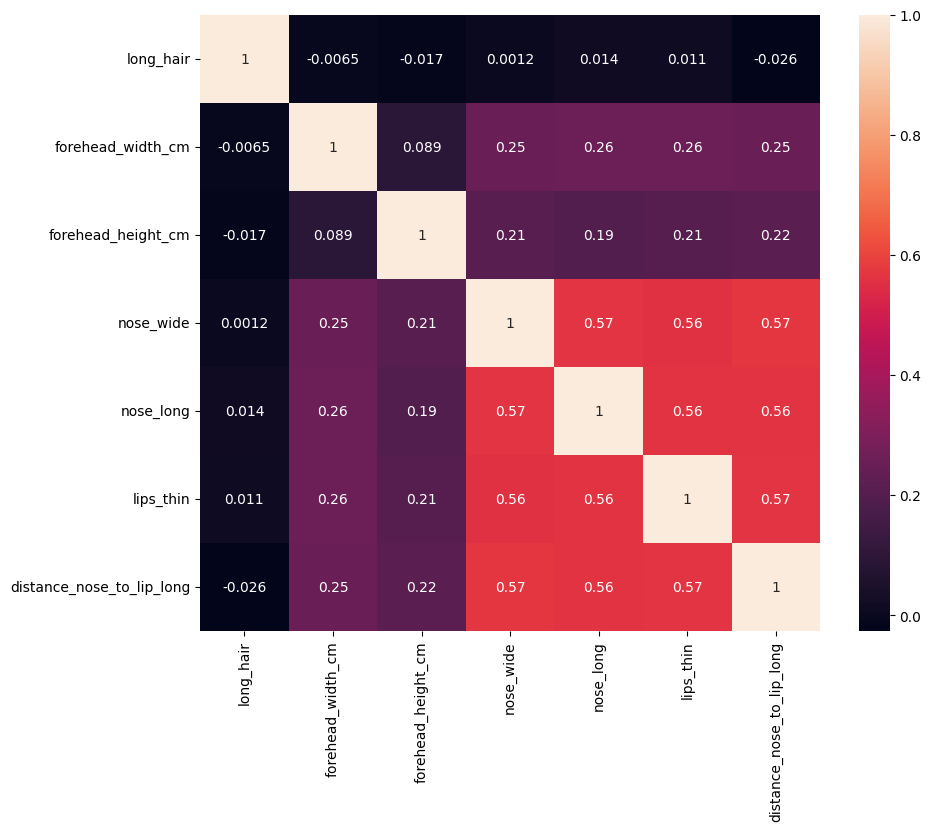

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [25]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Countplot', 'Percentages'),
                    specs=[[{"type": "xy"}, {'type':'domain'}]])

# Bar Plot
fig.add_trace(go.Bar(y=df['long_hair'].value_counts().values.tolist(),
                     x=['1', '0'],
                     text=df['long_hair'].value_counts().values.tolist(),
                     textfont=dict(size=15),
                     textposition='outside',
                     showlegend=False,
                     marker=dict(color=colors, line_color='black', line_width=3),
                     hoverinfo='text'), row=1, col=1)

# Pie Chart
fig.add_trace(go.Pie(labels=['Long Hair', 'Not Long Hair'],
                     values=df['long_hair'].value_counts().values,
                     textfont=dict(size=16),
                     hole=0.4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label'), row=1, col=2)

fig.update_yaxes(range=[0, 800])

# Mengubah latar belakang plot dan figure
fig.update_layout(
    paper_bgcolor='#FFFDE7',
    plot_bgcolor='#FFFDE7',
    title=dict(text="Long Hair Distribution", x=0.5, y=0.95),
    title_font_size=30
)

# Mengganti label pada sumbu x
fig.update_xaxes(title_text="Long Hair", ticktext=['Not Long Hair', 'Long Hair'], tickvals=[0, 1], row=1, col=1)

# Menampilkan plot
iplot(fig)


In [26]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Countplot', 'Percentages'),
                    specs=[[{"type": "xy"}, {'type':'domain'}]])

# Bar Plot
fig.add_trace(go.Bar(y=df['nose_wide'].value_counts().values.tolist(),
                     x=['0', '1'],
                     text=df['nose_wide'].value_counts().values.tolist(),
                     textfont=dict(size=15),
                     textposition='outside',
                     showlegend=False,
                     marker=dict(color=colors, line_color='black', line_width=3),
                     hoverinfo='text'), row=1, col=1)

# Pie Chart
fig.add_trace(go.Pie(labels=['Not wide nose', 'Wide nose'],
                     values=df['nose_wide'].value_counts().values,
                     textfont=dict(size=16),
                     hole=0.4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label'), row=1, col=2)

fig.update_yaxes(range=[0, 800])

# Mengubah latar belakang plot dan figure
fig.update_layout(
    paper_bgcolor='#FFFDE7',
    plot_bgcolor='#FFFDE7',
    title=dict(text="Wide Nose Distribution", x=0.5, y=0.95),
    title_font_size=30
)

# Mengganti label pada sumbu x
fig.update_xaxes(title_text="Wide Nose", ticktext=['Not Wide Nose', 'Wide Nose'], tickvals=[0, 1], row=1, col=1)

# Menampilkan plot
iplot(fig)


In [27]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Countplot', 'Percentages'),
                    specs=[[{"type": "xy"}, {'type':'domain'}]])

# Bar Plot
fig.add_trace(go.Bar(y=df['gender'].value_counts().values.tolist(),
                     x=['Female', 'Male'],
                     text=df['gender'].value_counts().values.tolist(),
                     textfont=dict(size=15),
                     textposition='outside',
                     showlegend=False,
                     marker=dict(color=colors, line_color='black', line_width=3),
                     hoverinfo='text'), row=1, col=1)

# Pie Chart
fig.add_trace(go.Pie(labels=['Female','Male'],
                     values=df['gender'].value_counts().values,
                     textfont=dict(size=16),
                     hole=0.4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label'), row=1, col=2)

fig.update_yaxes(range=[0, 600])

# Mengubah latar belakang plot dan figure
fig.update_layout(
    paper_bgcolor='#FFFDE7',
    plot_bgcolor='#FFFDE7',
    title=dict(text="Gender Distribution", x=0.5, y=0.95),
    title_font_size=30
)

# Mengganti label pada sumbu x bar plot
fig.update_xaxes(title_text="Gender", ticktext=['Female','Male'], tickvals=[0, 1, 2], row=1, col=1)

# Menampilkan plot
iplot(fig)


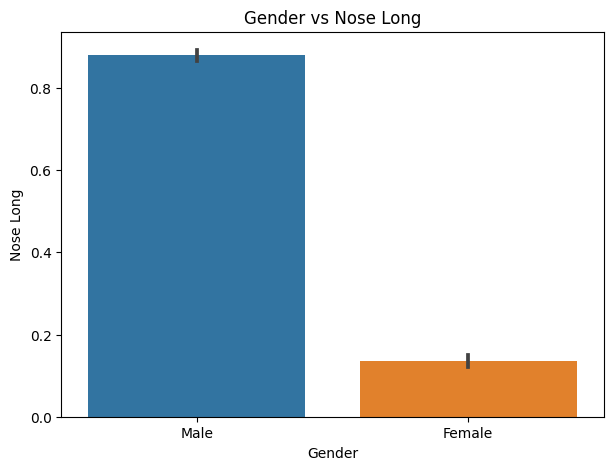

In [28]:
plt.figure(figsize=(7,5))
sns.barplot(x='gender',y='nose_long',data=df)
plt.title('Gender vs Nose Long')
plt.xlabel('Gender')
plt.ylabel('Nose Long')
plt.show()

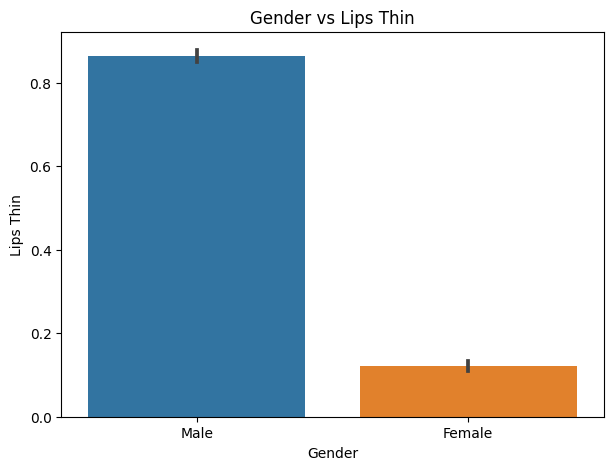

In [29]:
plt.figure(figsize=(7,5))
sns.barplot(x='gender',y='lips_thin',data=df)
plt.title('Gender vs Lips Thin')
plt.xlabel('Gender')
plt.ylabel('Lips Thin')
plt.show()

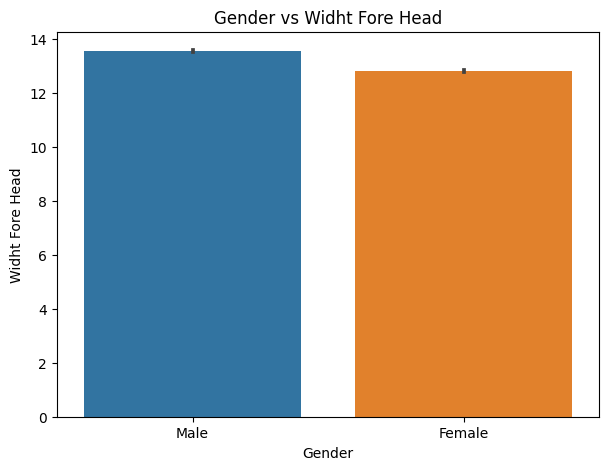

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(x='gender',y='forehead_width_cm',data=df)
plt.title('Gender vs Widht Fore Head')
plt.xlabel('Gender')
plt.ylabel('Widht Fore Head')
plt.show()

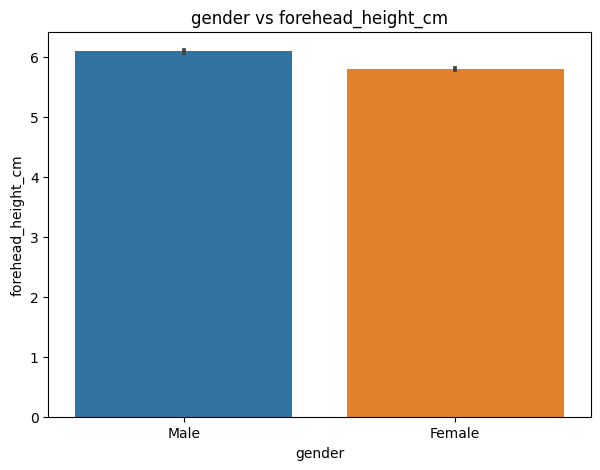

In [31]:
plt.figure(figsize=(7,5))
sns.barplot(x='gender',y='forehead_height_cm',data=df)
plt.title('gender vs forehead_height_cm')
plt.xlabel('gender')
plt.ylabel('forehead_height_cm')
plt.show()

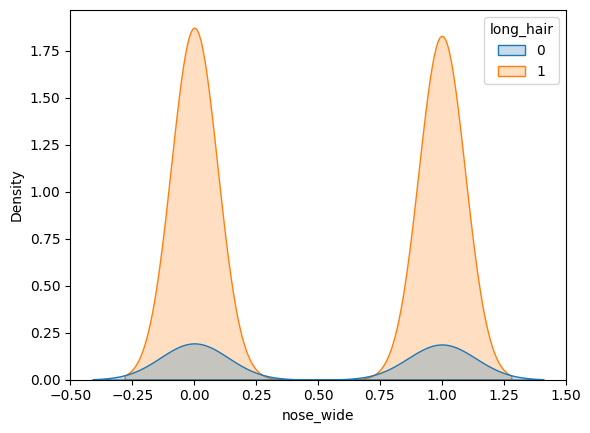

In [32]:
fig, ax = plt.subplots(1, 1)
sns.kdeplot(data=df, x='nose_wide', hue='long_hair', fill=True)
plt.show()


# Data Preparation

In [33]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [34]:
numerical

['long_hair',
 'forehead_width_cm',
 'forehead_height_cm',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long']

In [35]:
 catgcols

['gender']

In [36]:
ind_col = [col for col in df.columns if col != 'gender']
dep_col = 'gender'

In [37]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [38]:
x = df.drop(columns='gender', axis=1)
y = df['gender']

In [39]:
print(x)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

In [40]:
print(y)

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object


In [41]:
features = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',	'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
x = df[features]
y = df['gender']
print(x.shape)
print(y.shape)

(5001, 7)
(5001,)


In [42]:
x = df.drop(columns='gender', axis=1)
y = df['gender']

In [43]:
print(x)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

In [44]:
print(y)

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object


In [45]:
features = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',	'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
x = df[features]
y = df['gender']
print(x.shape)
print(y.shape)

(5001, 7)
(5001,)


#Modelling

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=80)
y_test.shape
x_train.shape

(4000, 7)

In [47]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [48]:
score = model.score(x_test, y_test)
print('akurasi model knn =', score)

akurasi model knn = 0.971028971028971


In [49]:
param_grid = {'n_neighbors':np.arange(1,5)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9664083916083916
Best Parameters: {'n_neighbors': 3}


In [50]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

cv_scores = cross_val_score(knn, x, y, cv=6)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(cv_scores)
print("\n average 6 fold tree : {}".format(np.mean(cv_scores)))

y_pred_proba=knn.predict_proba(x_test)[:,1]

print("\n ROC AUC Score knn : {}".format(roc_auc_score(y_test, y_pred_proba)))
print("\n accuracy score : {}".format(accuracy_score(y_test,y_pred)))

[[491   8]
 [ 21 481]]
              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       499
        Male       0.98      0.96      0.97       502

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

[0.9616307  0.96882494 0.96282974 0.97839136 0.97118848 0.97358944]

 average 6 fold tree : 0.9694091065682868

 ROC AUC Score knn : 0.9844849060671144

 accuracy score : 0.971028971028971


##Simulasi Data

In [51]:
input_data = np.array([[1, 11.8, 6.1, 1, 0, 1, 1]])
prediction = model.predict(input_data)
print('Estimasi Gender = ', prediction)

Estimasi Gender =  ['Male']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



#Visualisasi Hasil Modelling

Text(0.5, 23.52222222222222, 'Predicted label')

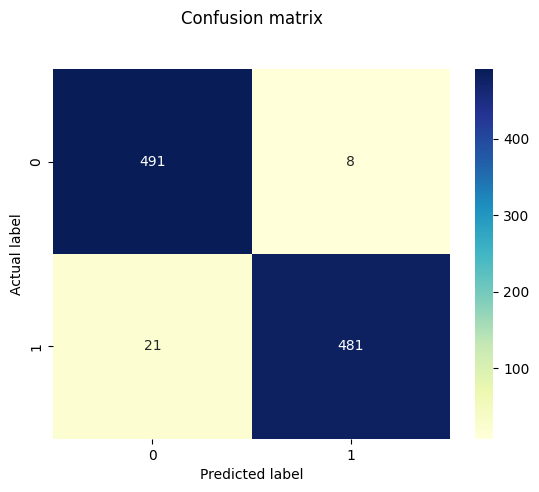

In [52]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)


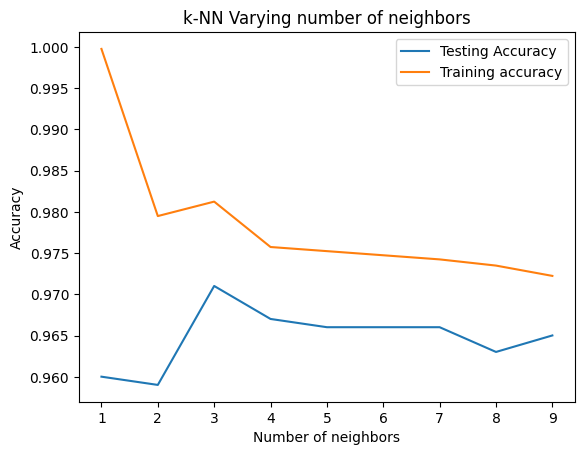

Neighbors: 1, Testing Accuracy: 0.9600, Training Accuracy: 0.9998
Neighbors: 2, Testing Accuracy: 0.9590, Training Accuracy: 0.9795
Neighbors: 3, Testing Accuracy: 0.9710, Training Accuracy: 0.9812
Neighbors: 4, Testing Accuracy: 0.9670, Training Accuracy: 0.9758
Neighbors: 5, Testing Accuracy: 0.9660, Training Accuracy: 0.9752
Neighbors: 6, Testing Accuracy: 0.9660, Training Accuracy: 0.9748
Neighbors: 7, Testing Accuracy: 0.9660, Training Accuracy: 0.9742
Neighbors: 8, Testing Accuracy: 0.9630, Training Accuracy: 0.9735
Neighbors: 9, Testing Accuracy: 0.9650, Training Accuracy: 0.9722


In [54]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Print the accuracy values
for neighbor, test_acc, train_acc in zip(neighbors, test_accuracy, train_accuracy):
    print(f"Neighbors: {neighbor}, Testing Accuracy: {test_acc:.4f}, Training Accuracy: {train_acc:.4f}")


In [55]:
error_rate= []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [56]:
for k, error in zip(range(1, 5), error_rate):
    print(f"K = {k}, Error Rate = {error:.4f}")

plt.show()

K = 1, Error Rate = 0.0400
K = 2, Error Rate = 0.0410
K = 3, Error Rate = 0.0290
K = 4, Error Rate = 0.0330


Text(0, 0.5, 'Error Rate')

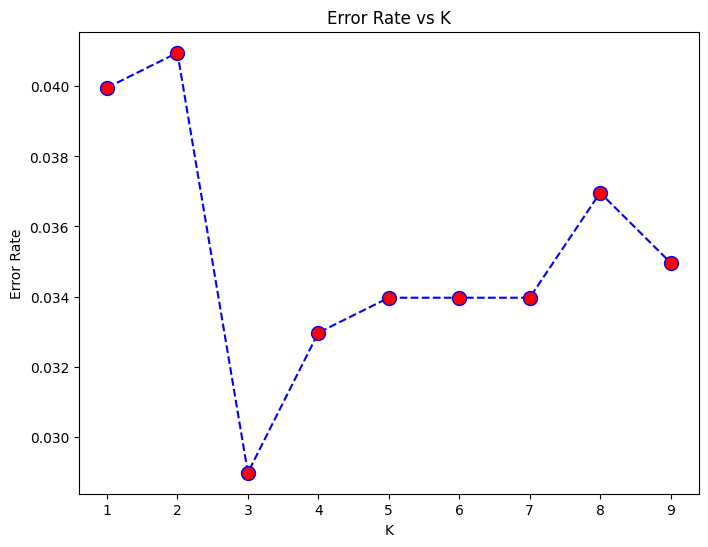

In [57]:
plt.figure(figsize = (8,6))
plt.plot(range(1,10),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

K = 1, Accuracy = 0.9600
K = 2, Accuracy = 0.9590
K = 3, Accuracy = 0.9710
K = 4, Accuracy = 0.9670


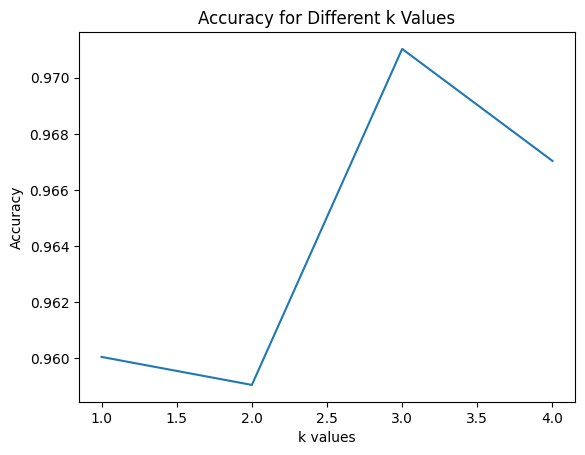

In [58]:
score_list = []
for k in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    score_list.append(score)
    print(f"K = {k}, Accuracy = {score:.4f}")

# Plot the accuracy for different k values
plt.plot(range(1, 5), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different k Values")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



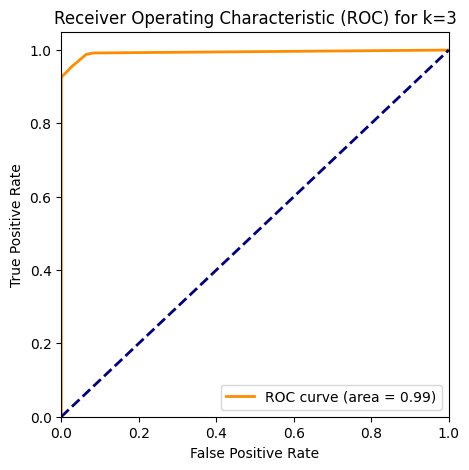

AUC for k=3: 0.9935


In [59]:
# Convert categorical labels to binary format
label_binarizer = LabelBinarizer()
y_train_bin = label_binarizer.fit_transform(y_train)
y_test_bin = label_binarizer.transform(y_test)

# Create and train the KNN model for k=8
k_value = 8
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(x_train, y_train_bin)

# Make predictions on the testing set
y_pred_proba = knn.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for k=3
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for k=3')
plt.legend(loc="lower right")
plt.show()

# Print AUC value for k=8
print(f"AUC for k=3: {roc_auc:.4f}")


In [60]:
def knn_algorithm(k, x1, x2):
    euclidean_distance = []

    for i in range(df.shape[0]):
        euclidean_distance.append(np.sqrt(np.dot(df.iloc[i].values[:2] - [x1, x2], df.iloc[i].values[:2] - [x1, x2])))

    index = np.argsort(euclidean_distance)
    index = index[:k]
    label = [df.gender[i] for i in index]
    label = statistics.mode(label)

    palette = sns.color_palette("husl", 2)
    colors = {0: palette[0], 1: palette[1]}

    fig = plt.figure(figsize=(15, 8))
    sns.scatterplot(data=df, x='long_hair', y='nose_wide', hue='gender',
                    alpha=0.9, s=250, palette=palette)

    for i in index:
        target_value = df.iloc[i].values[-1]
        if isinstance(target_value, (int, float)):  # Check if the target value is numeric
            color = colors[target_value]
        else:
            color = 'gray'  # Assign a specific color for non-numeric values
        plt.scatter(x=df['long_hair'][i], y=df['nose_wide'][i], s=250, alpha=0.6, linewidth=2, edgecolor='k', color=color)

    plt.scatter(x=x1, y=x2, s=400, marker='*', color='k')
    plt.title(label=f'K-Nearest Neighbor with K = {k}', fontsize=14)
    ax = fig.get_axes()[0]
    ax.set_axis_off()
    plt.show()

    return f'Predictions: {label}'

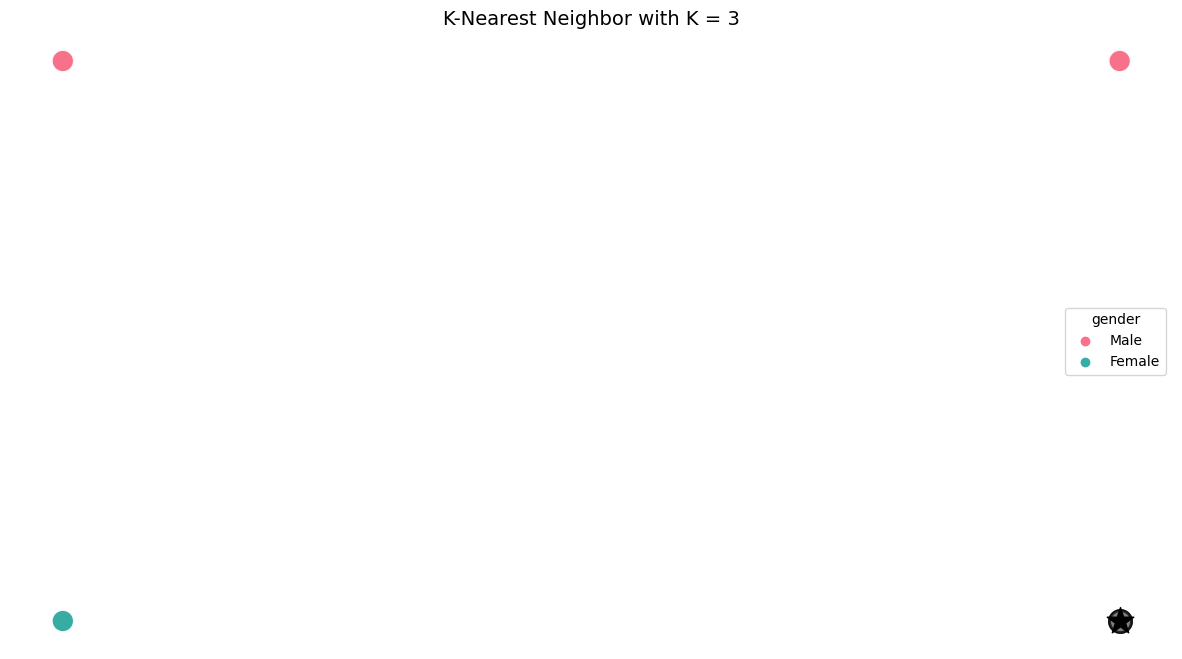

Predictions: Female


In [61]:
k_value = 3
x1_value = 1
x2_value = 0

result = knn_algorithm(k_value, x1_value, x2_value)
print(result)

In [62]:
def knn_algorithm(k, x1, x2):
    euclidean_distance = []

    for i in range(df.shape[0]):
        euclidean_distance.append(np.sqrt(np.dot(df.iloc[i].values[:2] - [x1, x2], df.iloc[i].values[:2] - [x1, x2])))

    index = np.argsort(euclidean_distance)
    index = index[:k]
    label = [df.gender[i] for i in index]
    label = statistics.mode(label)

    palette = sns.color_palette("husl", 2)
    colors = {0: palette[0], 1: palette[1]}

    fig = plt.figure(figsize=(15, 8))
    sns.scatterplot(data=df, x='forehead_height_cm', y='forehead_width_cm', hue='gender',
                    alpha=0.9, s=250, palette=palette)

    for i in index:
        target_value = df.iloc[i].values[-1]
        if isinstance(target_value, (int, float)):  # Check if the target value is numeric
            color = colors[target_value]
        else:
            color = 'gray'  # Assign a specific color for non-numeric values
        plt.scatter(x=df['forehead_height_cm'][i], y=df['forehead_width_cm'][i], s=250, alpha=0.6, linewidth=2, edgecolor='k', color=color)

    plt.scatter(x=x1, y=x2, s=400, marker='*', color='k')
    plt.title(label=f'K-Nearest Neighbor with K = {k}', fontsize=14)
    ax = fig.get_axes()[0]
    ax.set_axis_off()
    plt.show()

    return f'Predictions: {label}'

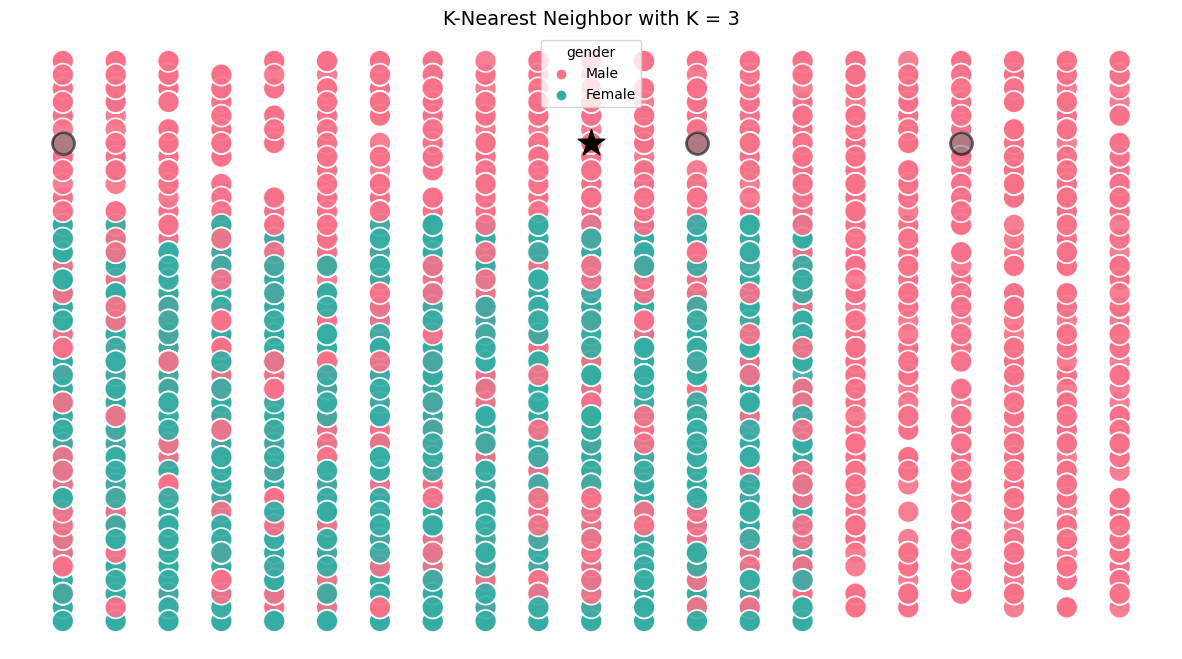

Predictions: Male


In [63]:
k_value = 3
x1_value = 6.1
x2_value = 14.9

result = knn_algorithm(k_value, x1_value, x2_value)
print(result)

In [64]:
import pickle

filename = 'gender.sav'
pickle.dump(knn,open(filename,'wb'))